In [11]:
# project: p11
# submitter: essenter
# partner: puri6

In [12]:
import os, json, csv, collections
%matplotlib inline
import pandas as pd
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [13]:
Tweet = collections.namedtuple('Tweet', 'tweet_id username num_liked length')
full_data_dir = sorted(os.listdir("full_data"), reverse = True)
full_data_dir

['meta.info',
 'agency_info',
 '5.json',
 '5.csv',
 '4.json',
 '4.csv',
 '3.json',
 '3.csv',
 '2.json',
 '2.csv',
 '1.json',
 '1.csv']

In [14]:
def LoadTweets(folder):
    tuples = []
    for file in full_data_dir:
        name, extension = os.path.splitext(file)
        if 'json' in extension:
            try:
                f = open(os.path.join(folder, file))
                data = json.load(f)
                f.close
                for row_dict in data:
                    tweet_id = row_dict
                    try:
                        tuples.append(Tweet(tweet_id, data[row_dict]['username'], int(data[row_dict]['num_liked']), len(data[row_dict]['tweet_text'])))
                    except:
                        try:
                            tuples.append(Tweet(tweet_id, data[row_dict]['username'], str(data[row_dict]['num_liked']), len(data[row_dict]['tweet_text'])))
                        except:
                            pass
            except:
                pass
        if 'csv' in extension:
            try:
                f = open(os.path.join(folder, file))
                reader = csv.DictReader(f)
                f.close
                for row_dict in reader:
                    try:
                        tuples.append(Tweet(row_dict['tweet_id'], row_dict['username'], int(row_dict['num_liked']), len(row_dict['tweet_text'])))
                    except:
                        try:
                            if len(row_dict['num_liked']) < 7:
                                tuples.append(Tweet(row_dict['tweet_id'], row_dict['username'], str(row_dict['num_liked']), len(row_dict['tweet_text'])))
                        except:
                            pass
            except:
                pass
    return tuples

In [15]:
#q1

full_data_tweets = LoadTweets("full_data")
len(full_data_tweets)

445

In [16]:
#q2

username_set = set()
for tweet in full_data_tweets:
    username_set.add(tweet[1])
username_set

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [17]:
#q3

prolific_dict = {}
for user in username_set:
    prolific_dict[user] = 0
for tweet in full_data_tweets:
    prolific_dict[tweet[1]] += 1
prolific_dict

{'USERID_9': 44,
 'USERID_3': 39,
 'USERID_2': 47,
 'USERID_7': 55,
 'USERID_5': 46,
 'USERID_1': 52,
 'USERID_4': 35,
 'USERID_10': 45,
 'USERID_8': 31,
 'USERID_6': 51}

In [18]:
#q4

def find_most_liked(username):
    current_highest = 0
    letters = ['m', 'k']
    for tweet in full_data_tweets:
        try:
            num_liked = int(tweet[2])
        except:
            if tweet[2][-1].lower() == 'm':
                num_liked = int(tweet[2][:-1]) * 1000000
            if tweet[2][-1].lower() == 'k':
                num_liked = int(tweet[2][:-1]) * 1000                      
        if tweet[1] == username:
            if num_liked > current_highest:
                current_highest = num_liked
    return current_highest

most_liked_dict = {}
for user in username_set:
    most_liked_dict[user] = find_most_liked(user)
most_liked_dict  

{'USERID_9': 9728,
 'USERID_3': 9678,
 'USERID_2': 869000000,
 'USERID_7': 9851,
 'USERID_5': 9608,
 'USERID_1': 9393,
 'USERID_4': 9618,
 'USERID_10': 9936,
 'USERID_8': 915000,
 'USERID_6': 9149}

In [19]:
#q5

def find_longest_tweet(username):
    current_highest = 0
    for tweet in full_data_tweets:
        if tweet[1] == username:
            if tweet[3] > current_highest:
                current_highest = tweet[3]
    return current_highest
longest_tweet_dict = {}
for user in username_set:
    longest_tweet_dict[user] = find_longest_tweet(user)
longest_tweet_dict

{'USERID_9': 137,
 'USERID_3': 138,
 'USERID_2': 138,
 'USERID_7': 144,
 'USERID_5': 146,
 'USERID_1': 150,
 'USERID_4': 138,
 'USERID_10': 136,
 'USERID_8': 145,
 'USERID_6': 145}

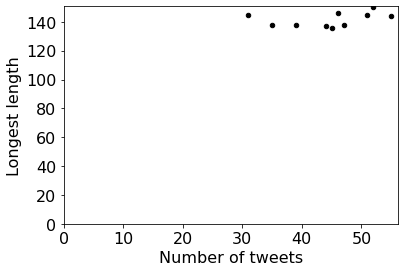

In [20]:
#q6

scatter(prolific_dict,
        longest_tweet_dict,
        xlabel="Number of tweets", ylabel="Longest length")

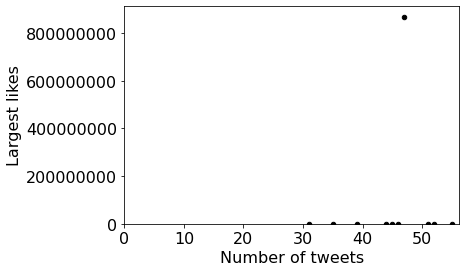

In [21]:
#q7

scatter(prolific_dict,
        most_liked_dict,
        xlabel="Number of tweets", ylabel="Largest likes")

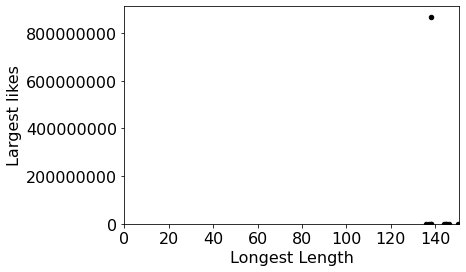

In [22]:
#q8

scatter(longest_tweet_dict,
        most_liked_dict,
        xlabel="Longest Length", ylabel="Largest likes")

In [2]:
#q9

for user in username_set:
    if most_liked_dict[user] > 2000000:
        outlier = user
outlier = None
highest = 0
for user in username_set:
    if most_liked_dict[user] > highest:
        highest = most_liked_dict[user]
        outlier = user
outlier

NameError: name 'username_set' is not defined

In [24]:
#q10

user_2_tweets = []
for tweet in full_data_tweets:
    if tweet[1] == outlier:
        user_2_tweets.append(tweet)
def num_liked(tweet):
    try:
        integer = int(tweet[2])
    except:
        if tweet[2][-1].lower() == 'm':
            integer = int(tweet[2][:-1]) * 1000000
        if tweet[2][-1].lower() == 'k':
            integer = int(tweet[2][:-1]) * 1000
    return integer

def num_liked(tweet):
    num_liked = tweet[2]
    return num_liked
user_2_tweets = sorted(user_2_tweets, key=num_liked, reverse = True)
user_2_tweets        

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked='869M', length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USERID

In [25]:
#q11
running_total = 0
i = 0
for tweet in outlier_tweets[1:]:
    running_total += tweet[2]
    i +=1
    
running_total/i
    

5003.565217391304

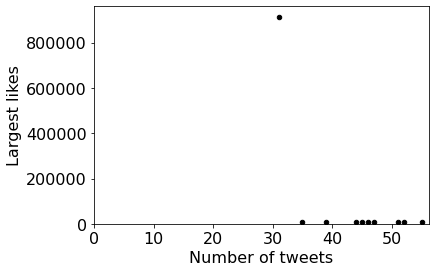

In [26]:
#q12
def find_most_liked(username):
    current_highest = 0
    letters = ['m', 'k']
    for tweet in full_data_tweets:
        try:
            num_liked = int(tweet[2])
        except:
            if tweet[2][-1].lower() == 'm':
                num_liked = int(tweet[2][:-1]) * 0
            if tweet[2][-1].lower() == 'k':
                num_liked = int(tweet[2][:-1]) * 1000                      
        if tweet[1] == username:
            if num_liked > current_highest:
                current_highest = num_liked
    return current_highest

most_liked_dict = {}
for user in username_set:
    most_liked_dict[user] = find_most_liked(user)
most_liked_dict
scatter(prolific_dict,
        most_liked_dict,
        xlabel="Number of tweets", ylabel="Largest likes")

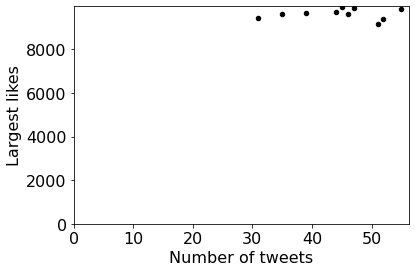

In [33]:
#q13
def find_most_liked(username):
    current_highest = 0
    letters = ['m', 'k']
    for tweet in full_data_tweets:
        try:
            num_liked = int(tweet[2])
        except:
            if tweet[2][-1].lower() == 'm':
                num_liked = int(tweet[2][:-1]) * 0
            if tweet[2][-1].lower() == 'k':
                num_liked = int(tweet[2][:-1]) * 0                      
        if tweet[1] == username:
            if num_liked > current_highest:
                current_highest = num_liked
    return current_highest

most_liked_dict = {}
for user in username_set:
    most_liked_dict[user] = find_most_liked(user)
most_liked_dict
scatter(prolific_dict,
        most_liked_dict,
        xlabel="Number of tweets", ylabel="Largest likes")

In [34]:
#q14
def directory_list(directory):
    paths_list = []
    directory_list = os.listdir(directory)
    new_directory_list = []
    for path in directory_list:
        if os.path.isfile(os.path.join(directory, path)) == True:
            new_directory_list.append(os.path.join(directory, path))
        else:
            paths_list.append(os.path.join(directory, path))
    for path in paths_list:
        path_dir_list = os.listdir(path)
        for subdir in path_dir_list:
            if os.path.isfile(os.path.join(path, subdir)) == True:
                new_directory_list.append(os.path.join(path, subdir))
            else:
                paths_list.append(os.path.join(path, subdir))
    new_directory_list = sorted(new_directory_list, reverse = True)
    return new_directory_list



def directory_list(directory):
    new_directory_list = []
    directory_list = os.listdir(directory)
    for path in directory_list:
        if os.path.isfile(os.path.join(directory, path)) == True:
            new_directory_list.append(os.path.join(directory, path))
        else:
            directory_list(path)
    return new_directory_list
    
directory_list("play/rb/rb8")

[]

In [35]:
#q15

directory_list(os.path.join("play", "ou"))

['play\\ou\\v',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\b',
 'play\\ou\\a']

In [36]:
#q16

directory_list("play")

['play\\rb\\rb9\\89.csv',
 'play\\rb\\rb9\\12.xls',
 'play\\rb\\ppt.ppt',
 'play\\ou\\v',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\b',
 'play\\ou\\a',
 'play\\ls\\qwe\\usun.pdf',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\mf.py',
 'play\\ls\\lu.txt']

In [37]:
#q17

directory_list(os.path.join("recursive", "others"))

['recursive\\others\\USERID_9.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_10.json']

In [38]:
#q18

directory_list("recursive")

['recursive\\others\\USERID_9.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_10.json',
 'recursive\\USERID_4\\true\\tweets.json',
 'recursive\\USERID_4\\false\\tweets.json',
 'recursive\\USERID_3\\tweets.json',
 'recursive\\USERID_2\\tweets.json',
 'recursive\\USERID_1\\tweets.json']

In [39]:
def AmountTweets(directory):
    dir_list = directory_list(directory)
    tuples = []
    for file in dir_list:
        name, extension = os.path.splitext(file)
        if 'json' in extension:
            try:
                f = open(file)
                data = json.load(f)
                f.close
                for row_dict in data:
                    tweet_id = row_dict
                    try:
                        tuples.append(Tweet(tweet_id, data[row_dict]['username'], int(data[row_dict]['num_liked']), len(data[row_dict]['tweet_text'])))
                    except:
                        try:
                            tuples.append(Tweet(tweet_id, data[row_dict]['username'], str(data[row_dict]['num_liked']), len(data[row_dict]['tweet_text'])))
                        except:
                            pass
            except:
                pass
        if 'csv' in extension:
            try:
                f = open(file)
                reader = csv.DictReader(f)
                f.close
                for row_dict in reader:
                    try:
                        tuples.append(Tweet(row_dict['tweet_id'], row_dict['username'], int(row_dict['num_liked']), len(row_dict['tweet_text'])))
                    except:
                        try:
                            if len(row_dict['num_liked']) < 7:
                                tuples.append(Tweet(row_dict['tweet_id'], row_dict['username'], str(row_dict['num_liked']), len(row_dict['tweet_text'])))
                        except:
                            pass
            except:
                pass
    return len(tuples)

In [40]:
#q19

AmountTweets(os.path.join("recursive", "USERID_4"))

17

In [41]:
#q20

AmountTweets("recursive")

200